# 7.7 Assignment: Expectation Maximization


### TABLE OF CONTENTS
[Part 1: EM v K-Means](#Part-1:-EM-v-K-Means)

[Part 2: EM application](#Part-2:-EM-application)

# Part 1: EM v K-Means

EM falls under unsupervised learning. But what specific kind of unsupervised learning setting would you use it for? Put differently, you could use both k-means and EM for clustering, but when will you pick EM over k-means?

K-means is a special variant of the expectation maximization algorithm, but the main difference is it assumes that the clusters in the data are well-defined, and spherical. Because of this assumption, when we work with data that likely has well-defined spherical clusters, we should choose K-means. On the other hand, if we have data with more complex distributions, or need less rigid clusters, we’d choose EM because we’re not limited to spherical groupings. EM will also allow us to detect sub-populations within the data, though it’s important to note that EM is more sensitive to outliers in the data, but if we preprocess the data effectively, using this method over k-means would give us more control over the characteristics of the cluster. When we have more computational power, EM will be a better choice than k-means. 

# Part 2: EM application

The following dataset was obtained from Belsley, Kuh, and Welsch (1980), which they obtained from Sterling (1977). The dataset involves the life-cycle savings hypothesis developed by Franco Modigliani and includes data averaged over the 1960-1970 decase to remove the business cycle and other short-term fluctuations.

Per Modigliani's hypothesis,  the savings ratio (aggregate personal savings divided by disposable income) is explained by per-capita disposable income, the percentage rate of change in per-capita disposable income, and two demographic variables: The percentage of population less than 15 years old and the percentage of the population over 75 years old.

### Attributes in the data:
- Country

- Sr: numeric, aggregate personal savings

- pop15: numeric, % of the population under 15

- pop75: numeric, % of the population over 75

- dpi: numeric, real per-capita disposable income

- ddpi: numeric, % growth rate of dpi

### TABLE OF CONTENTS:
[Data processing](#Data-processing)

[EM](#EM)

[Conclusions](#Conclusions)

#### Objectives:
1. Use EM for clustering “similar” countries.

2. Report groups with the help of AIC and BIC. 

# Libraries

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

# Data processing

In [2]:
#load data
life_cycle_data = pd.read_csv('Assignment 7 data-lifecyclesaving.csv')

#inspect
life_cycle_data.head()

,Contry,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56


In [3]:
life_cycle_data.shape

(50, 6)

In [4]:
life_cycle_data.describe()

,sr,pop15,pop75,dpi,ddpi
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,9.671000,35.089600,2.293000,1106.758400,3.757600
std,4.480407,9.151727,1.290771,990.868889,2.869871
min,0.600000,21.440000,0.560000,88.940000,0.220000
25%,6.970000,26.215000,1.125000,288.207500,2.002500
50%,10.510000,32.575000,2.175000,695.665000,3.000000
75%,12.617500,44.065000,3.325000,1795.622500,4.477500
max,21.100000,47.640000,4.700000,4001.890000,16.710000


In [5]:
life_cycle_data.isna().sum().sum()

0

In [6]:
life_cycle_data['sr'].unique()

array([11.43, 12.07, 13.17,  5.75, 12.88,  8.79,  0.6 , 11.9 ,  4.98,
       10.78, 16.85,  3.59, 11.24, 12.64, 12.55, 10.67,  3.01,  7.7 ,
        1.27,  9.  , 11.34, 14.28, 21.1 ,  3.98, 10.35, 15.48, 10.25,
       14.65,  7.3 ,  4.44,  2.02, 12.7 , 12.78, 12.49, 11.14, 13.3 ,
       11.77,  6.86, 14.13,  5.13,  2.81,  7.81,  7.56,  9.22, 18.56,
        7.72,  9.24,  8.89,  4.71])

In [7]:
#examine pop15 values
life_cycle_data['pop15'].unique()

#need to standardize so they're of equal measure to pop75

array([29.35, 23.32, 23.8 , 41.89, 42.19, 31.72, 39.74, 44.75, 46.64,
       47.64, 24.42, 46.31, 27.84, 25.06, 23.31, 25.62, 46.05, 47.32,
       34.03, 41.31, 31.16, 24.52, 27.01, 41.74, 21.8 , 32.54, 25.95,
       24.71, 32.61, 45.04, 43.56, 41.18, 44.19, 46.26, 28.96, 31.94,
       31.92, 27.74, 21.44, 23.49, 43.42, 46.12, 23.27, 29.81, 46.4 ,
       45.25, 41.12, 28.13, 43.69, 47.2 ])

In [8]:
#examine pop75 values
life_cycle_data['pop75'].unique()

array([2.87, 4.41, 4.43, 1.67, 0.83, 2.85, 1.34, 0.67, 1.06, 1.14, 3.93,
       1.19, 2.37, 4.7 , 3.35, 3.1 , 0.87, 0.58, 3.08, 0.96, 4.19, 3.48,
       1.91, 0.91, 3.73, 2.47, 3.67, 3.25, 3.17, 1.21, 1.2 , 1.05, 1.28,
       1.12, 2.28, 1.52, 4.54, 1.08, 4.46, 3.43, 0.9 , 0.56, 1.73, 2.72,
       2.07, 0.66])

In [9]:
#examine dpi
life_cycle_data['dpi'].unique()

array([2329.68, 1507.99, 2108.47,  189.13,  728.47, 2982.88,  662.86,
        289.52,  276.65,  471.24, 2496.53,  287.77, 1681.25, 2213.82,
       2457.12,  870.85,  289.71,  232.44, 1900.1 ,   88.94, 1139.95,
       1390.  , 1257.28,  207.68, 2449.39,  601.05, 2231.03, 1740.7 ,
       1487.52,  325.54,  568.56,  220.56,  400.06,  152.01,  579.51,
        651.11,  250.96,  768.79, 3299.49, 2630.96,  389.66,  249.87,
       1813.93, 4001.89,  813.39,  138.33,  380.47,  766.54,  123.58,
        242.69])

In [10]:
#examine ddpi
life_cycle_data['ddpi'].unique()

array([ 2.87,  3.93,  3.82,  0.22,  4.56,  2.43,  2.67,  6.51,  3.08,
        2.8 ,  3.99,  2.19,  4.32,  4.52,  3.44,  6.28,  1.48,  3.19,
        1.12,  1.54,  2.99,  3.54,  8.21,  5.81,  1.57,  8.12,  3.62,
        7.66,  1.76,  2.48,  3.61,  1.03,  0.67,  2.  ,  7.48,  4.35,
        3.01,  2.7 ,  2.96,  1.13,  2.01,  2.45,  0.53,  5.14, 10.23,
        1.88, 16.71,  5.08])

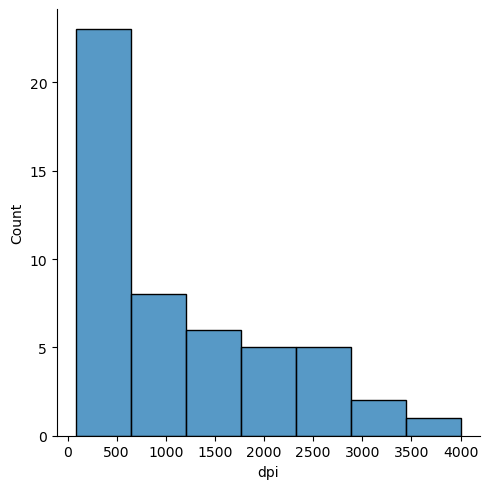

In [17]:
sns.displot(life_cycle_data, x = 'dpi')

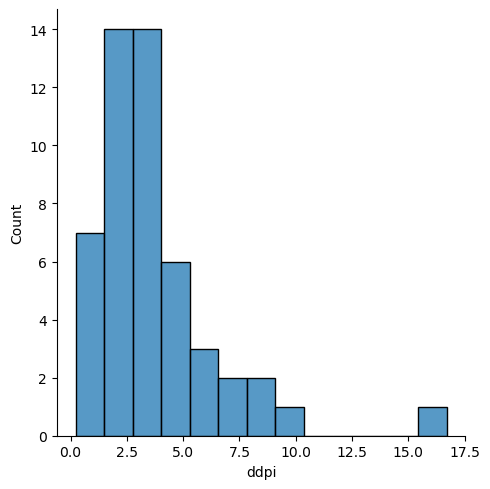

In [18]:
sns.displot(life_cycle_data, x = 'ddpi')

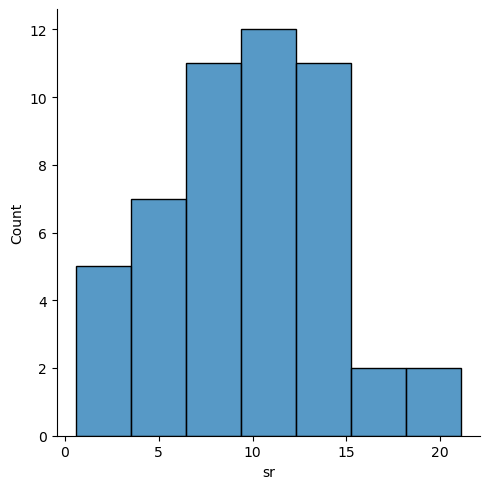

In [19]:
sns.displot(life_cycle_data, x = 'sr')

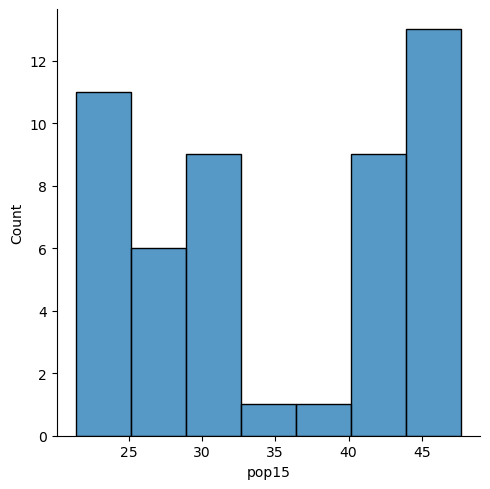

In [20]:
sns.displot(life_cycle_data, x = 'pop15')

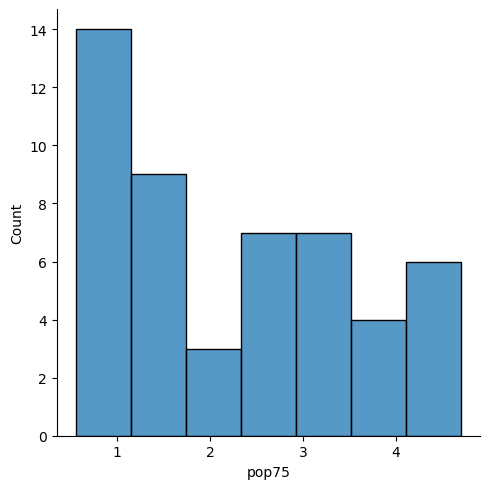

In [21]:
sns.displot(life_cycle_data, x = 'pop75')

In [24]:
life_cycle_data.columns

Index(['Contry', 'sr', 'pop15', 'pop75', 'dpi', 'ddpi'], dtype='object')

In [25]:
#standardize data since EM is sensitive to unequal weights
cols_standardize = life_cycle_data[['sr', 'pop15', 'pop75', 'dpi', 'ddpi']]

#initialize scaler
scaler = StandardScaler()

#fit & transform data
scaled_cols = scaler.fit_transform(cols_standardize)

#update df
life_cycle_data[['sr', 'pop15', 'pop75', 'dpi', 'ddpi']] = scaled_cols

#inspect
life_cycle_data.head()

,Contry,sr,pop15,pop75,dpi,ddpi
0,Australia,0.396584,-0.633528,0.451558,1.246721,-0.312422
1,Austria,0.540879,-1.299109,1.656756,0.409040,0.060682
2,Belgium,0.788885,-1.246127,1.672408,1.021206,0.021964
3,Bolivia,-0.884029,0.750617,-0.487557,-0.935487,-1.245184
4,Brazil,0.723501,0.783730,-1.144938,-0.385650,0.282433


# EM

The application of the expectation-maximization algorithm will be done through scikit learn's GaussianMixture model library. 

In [35]:
#set features for clustering
clustering_features = life_cycle_data[['sr', 'pop15', 'pop75', 'dpi', 'ddpi']]

#test different number of clusters
n_components = [2, 3, 5, 7]

#initialize number of folds
kfolds = 5

#initialize kfold cross-validation
kf = KFold(n_splits = kfolds, shuffle = True, random_state = 22)

#initialize lists to store AIC, BIC values
aic_bic_values = []

#loop through
for component in n_components:
    
    #loop through each fold in cv, split attributes into train/test to corroborate n_component 
    #parameter performance in model
    for train_index, test_index in kf.split(clustering_features):
    
        #initialize EM model
        gmm = GaussianMixture(n_components = component)
        
        #fit model
        gmm.fit(clustering_features)
        
        #get aic & bic
        fold_aic = gmm.aic(clustering_features)
        fold_bic = gmm.bic(clustering_features)
        
    #add aic, bic, and component # tested
    aic_bic_values.append([component, fold_aic, fold_bic])
    
metrics_df = pd.DataFrame(aic_bic_values, columns = ['component', 'aic', 'bic'])

In [36]:
metrics_df

,component,aic,bic
0,2,505.647252,584.040195
1,3,481.437851,599.983278
2,5,343.688688,542.539081
3,7,386.716214,665.871573


# Conclusions

Upon testing different numbers of clusters to find how many groups yield the best performing model, per the AIC results, having 5 groups led to the best Expectation-Maximization model. This is unsurprising because AIC penalizes simple models, and gives preference to more complex models. The BIC metric results also support 5 groups as the optimal number of clusters derived from the model as it has the lowest BIC value as well. This latter finding is somewhat surprising because BIC tends to favor simpler models. 

Therefore, the optimal number of similar country groups derived from the EM algorithm as applied to this dataset, is 5. 

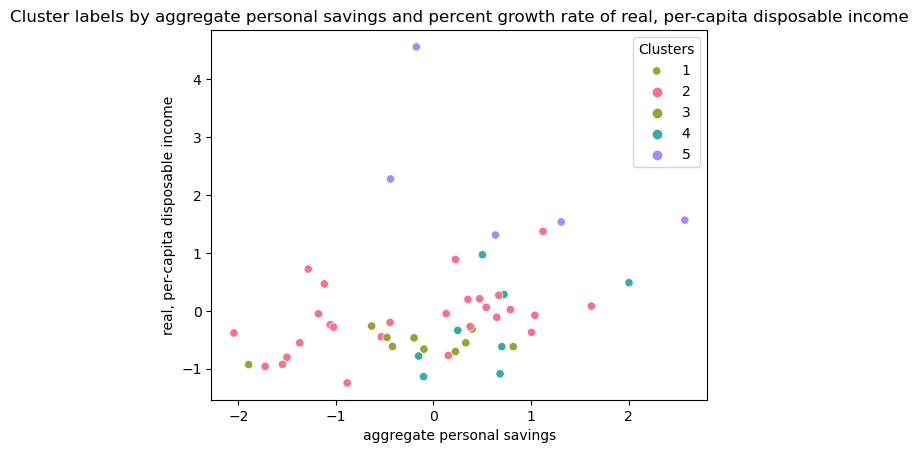

In [59]:
#visualize best model labels
optimal_components = 5
best_gmm = GaussianMixture(n_components = optimal_components)
best_gmm.fit(clustering_features)

#get labels for each datapoint/country
cluster_labels = best_gmm.predict(clustering_features)

sns.scatterplot(x=clustering_features['sr'], y = clustering_features['ddpi'], hue = cluster_labels, palette = 'husl')
plt.title('Cluster labels by aggregate personal savings and percent growth rate of real, per-capita disposable income')
plt.xlabel('aggregate personal savings')
plt.ylabel('real, per-capita disposable income')
plt.legend('12345', title = 'Clusters')
plt.show()